1.Extract Sample document and apply following document preprocessing methods:
Tokenization, POS Tagging, stop words removal, Stemming and Lemmatization.

2.Create representation of document by calculating Term Frequency and Inverse Document
Frequency.

In [78]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import  stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')


In [79]:
!pip install nltk

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [84]:
text = "The sun feet better was setting behind the mountains, casting a warm glow over the valley. Birds chirped their final songs of the day as they settled into their nests. A gentle breeze rustled through the trees, carrying the scent of pine and wildflowers. In the distance, a river meandered lazily, its waters reflecting the vibrant hues of the evening sky. As darkness descended, the stars began to twinkle overhead, painting the night with their celestial light."
lowercased_text = text.lower()

print(lowercased_text)

the sun feet better was setting behind the mountains, casting a warm glow over the valley. birds chirped their final songs of the day as they settled into their nests. a gentle breeze rustled through the trees, carrying the scent of pine and wildflowers. in the distance, a river meandered lazily, its waters reflecting the vibrant hues of the evening sky. as darkness descended, the stars began to twinkle overhead, painting the night with their celestial light.


In [85]:
tokenized_text=sent_tokenize(text)

print(tokenized_text)

['The sun feet better was setting behind the mountains, casting a warm glow over the valley.', 'Birds chirped their final songs of the day as they settled into their nests.', 'A gentle breeze rustled through the trees, carrying the scent of pine and wildflowers.', 'In the distance, a river meandered lazily, its waters reflecting the vibrant hues of the evening sky.', 'As darkness descended, the stars began to twinkle overhead, painting the night with their celestial light.']


In [86]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['The', 'sun', 'feet', 'better', 'was', 'setting', 'behind', 'the', 'mountains', ',', 'casting', 'a', 'warm', 'glow', 'over', 'the', 'valley', '.', 'Birds', 'chirped', 'their', 'final', 'songs', 'of', 'the', 'day', 'as', 'they', 'settled', 'into', 'their', 'nests', '.', 'A', 'gentle', 'breeze', 'rustled', 'through', 'the', 'trees', ',', 'carrying', 'the', 'scent', 'of', 'pine', 'and', 'wildflowers', '.', 'In', 'the', 'distance', ',', 'a', 'river', 'meandered', 'lazily', ',', 'its', 'waters', 'reflecting', 'the', 'vibrant', 'hues', 'of', 'the', 'evening', 'sky', '.', 'As', 'darkness', 'descended', ',', 'the', 'stars', 'began', 'to', 'twinkle', 'overhead', ',', 'painting', 'the', 'night', 'with', 'their', 'celestial', 'light', '.']


In [87]:

textlist = word_tokenize(text)

pos_tags = nltk.pos_tag(textlist)
print(pos_tags)

[('The', 'DT'), ('sun', 'NN'), ('feet', 'NNS'), ('better', 'RBR'), ('was', 'VBD'), ('setting', 'VBG'), ('behind', 'IN'), ('the', 'DT'), ('mountains', 'NNS'), (',', ','), ('casting', 'VBG'), ('a', 'DT'), ('warm', 'JJ'), ('glow', 'NN'), ('over', 'IN'), ('the', 'DT'), ('valley', 'NN'), ('.', '.'), ('Birds', 'NNS'), ('chirped', 'VBD'), ('their', 'PRP$'), ('final', 'JJ'), ('songs', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('day', 'NN'), ('as', 'IN'), ('they', 'PRP'), ('settled', 'VBD'), ('into', 'IN'), ('their', 'PRP$'), ('nests', 'NNS'), ('.', '.'), ('A', 'DT'), ('gentle', 'JJ'), ('breeze', 'NN'), ('rustled', 'VBD'), ('through', 'IN'), ('the', 'DT'), ('trees', 'NNS'), (',', ','), ('carrying', 'VBG'), ('the', 'DT'), ('scent', 'NN'), ('of', 'IN'), ('pine', 'NN'), ('and', 'CC'), ('wildflowers', 'NNS'), ('.', '.'), ('In', 'IN'), ('the', 'DT'), ('distance', 'NN'), (',', ','), ('a', 'DT'), ('river', 'NN'), ('meandered', 'VBN'), ('lazily', 'RB'), (',', ','), ('its', 'PRP$'), ('waters', 'NNS'), ('refl

In [115]:
# removing stop words

finaltext ="";
def remove_stopwords(text, language):
    stop_words = set(stopwords.words(language))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    print(language)
    sent = "";
    for i in filtered_text:
        sent += i
        sent += " "
    return sent

text = remove_stopwords(text, "english")
print(text)

<bound method WordListCorpusReader.words of <WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>>
english
The sun foot better setting behind mountains. Birds chirping final songs day. 


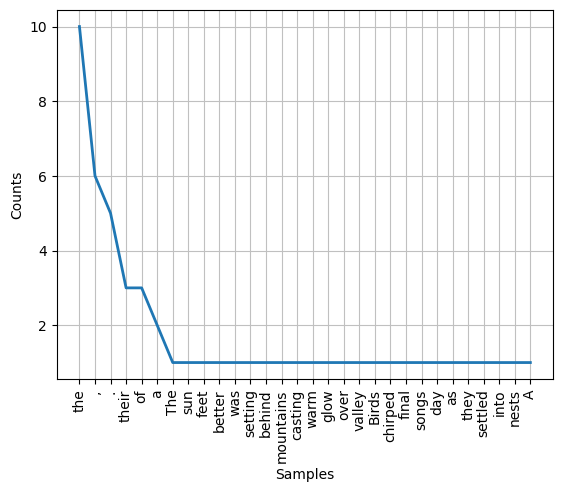

In [112]:
fdist.plot(30 , cumulative=False)
plt.show()

In [109]:
# The word "running" would be lemmatized to "run".
# The word "feet" would be lemmatized to "foot" (since "foot" is the singular form of "feet").
# The word "better" would be lemmatized to "good" "well" (since "good" is its base form).

lemmatizer = WordNetLemmatizer()

def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

sentence = text

pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
print("pos_tagged original ")
print(pos_tagged)

wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
print("pos_tagged for lemmitization ")
print(wordnet_tagged)

lemmatized_sentence = []
for word, tag in wordnet_tagged:
    if tag is None:
        lemmatized_sentence.append(word)
    else:
        lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))


# lemmatized_sentence = " ".join(lemmatized_sentence)

print("TEX")
print(text)
print("lemitize")
print(lemmatized_sentence)

pos_tagged original 
[('The', 'DT'), ('sun', 'JJ'), ('foot', 'NN'), ('better', 'RBR'), ('is', 'VBZ'), ('setting', 'VBG'), ('behind', 'IN'), ('the', 'DT'), ('mountains', 'NNS'), ('.', '.'), ('Birds', 'NNS'), ('are', 'VBP'), ('chirping', 'VBG'), ('their', 'PRP$'), ('final', 'JJ'), ('songs', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('day', 'NN'), ('.', '.')]
pos_tagged for lemmitization 
[('The', None), ('sun', 'a'), ('foot', 'n'), ('better', 'r'), ('is', 'v'), ('setting', 'v'), ('behind', None), ('the', None), ('mountains', 'n'), ('.', None), ('Birds', 'n'), ('are', 'v'), ('chirping', 'v'), ('their', None), ('final', 'a'), ('songs', 'n'), ('of', None), ('the', None), ('day', 'n'), ('.', None)]
TEX
The sun foot better is setting behind the mountains. Birds are chirping their final songs of the day.
lemitize
['The', 'sun', 'foot', 'well', 'be', 'set', 'behind', 'the', 'mountain', '.', 'Birds', 'be', 'chirp', 'their', 'final', 'song', 'of', 'the', 'day', '.']


In [95]:
# remove suffix and prefix
stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = text.split()
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

print(text)
stem_words(text)

The sun is setting behind the mountains. Birds are chirping their final songs of the day.


['the',
 'sun',
 'is',
 'set',
 'behind',
 'the',
 'mountains.',
 'bird',
 'are',
 'chirp',
 'their',
 'final',
 'song',
 'of',
 'the',
 'day.']

In [96]:


corpus = [
    "Sachin was the GOAT of the previous generation",
    "Virat is the GOAT of the this generation",
    "Shubman will be the GOAT of the next generation"
]


In [98]:
def calculate_tf_and_freq(document):
    tokens = word_tokenize(document.lower())
    tf = Counter(tokens)

    total_terms = len(tokens)

    for term in tf:
        tf[term] /= total_terms

    word_freq = Counter(tokens)
    return tf, word_freq


document = "This is a sample document. It contains sample text for demonstration."

word_tf, word_freq = calculate_tf_and_freq(document)


print("Word Vector with TFs and Frequencies:")
count = len(word_tokenize(document.lower()))

print(count)
for word, tf in word_tf.items():
    freq = word_freq[word]
    print(f"{word}: TF = {tf}, Frequency = {freq}")


Word Vector with TFs and Frequencies:
13
this: TF = 0.07692307692307693, Frequency = 1
is: TF = 0.07692307692307693, Frequency = 1
a: TF = 0.07692307692307693, Frequency = 1
sample: TF = 0.15384615384615385, Frequency = 2
document: TF = 0.07692307692307693, Frequency = 1
.: TF = 0.15384615384615385, Frequency = 2
it: TF = 0.07692307692307693, Frequency = 1
contains: TF = 0.07692307692307693, Frequency = 1
text: TF = 0.07692307692307693, Frequency = 1
for: TF = 0.07692307692307693, Frequency = 1
demonstration: TF = 0.07692307692307693, Frequency = 1


In [99]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(corpus)
print(matrix)
vectorizer.vocabulary_

  (0, 1)	0.25318287697299496
  (0, 6)	0.42867587431288195
  (0, 5)	0.25318287697299496
  (0, 2)	0.25318287697299496
  (0, 9)	0.5063657539459899
  (0, 12)	0.42867587431288195
  (0, 7)	0.42867587431288195
  (1, 10)	0.4286758743128819
  (1, 3)	0.4286758743128819
  (1, 11)	0.4286758743128819
  (1, 1)	0.25318287697299496
  (1, 5)	0.25318287697299496
  (1, 2)	0.25318287697299496
  (1, 9)	0.5063657539459899
  (2, 4)	0.39400039808922477
  (2, 0)	0.39400039808922477
  (2, 13)	0.39400039808922477
  (2, 8)	0.39400039808922477
  (2, 1)	0.23270298212286766
  (2, 5)	0.23270298212286766
  (2, 2)	0.23270298212286766
  (2, 9)	0.4654059642457353


{'sachin': 7,
 'was': 12,
 'the': 9,
 'goat': 2,
 'of': 5,
 'previous': 6,
 'generation': 1,
 'virat': 11,
 'is': 3,
 'this': 10,
 'shubman': 8,
 'will': 13,
 'be': 0,
 'next': 4}

In [100]:
print(vectorizer.get_feature_names_out())

['be' 'generation' 'goat' 'is' 'next' 'of' 'previous' 'sachin' 'shubman'
 'the' 'this' 'virat' 'was' 'will']


In [105]:

all_feature_names = vectorizer.get_feature_names_out()

for word in all_feature_names:
    indx = vectorizer.vocabulary_.get(word)
    print(indx)
    idf_score = vectorizer.idf_[indx]

    print(f"{word} : {idf_score}")

0
be : 1.6931471805599454
1
generation : 1.0
2
goat : 1.0
3
is : 1.6931471805599454
4
next : 1.6931471805599454
5
of : 1.0
6
previous : 1.6931471805599454
7
sachin : 1.6931471805599454
8
shubman : 1.6931471805599454
9
the : 1.0
10
this : 1.6931471805599454
11
virat : 1.6931471805599454
12
was : 1.6931471805599454
13
will : 1.6931471805599454
